In [1]:
σcarbon = .0031e-24
σwater = .5896e-24
σheavy = .0013e-24

σ_f = 582.6e-24
σ_cap_235 = 98.8e-24

ρcarbon = 1
ρwater =1
ρheavy =1 


mods = [[σcarbon],[σwater], [σheavy]]

mods[0][0]

k =1 
v = 2.6
for cross in mods:
    #print(cross[0])
    R = v*(σ_f/(σ_f+σ_cap_235))*(σ_f/cross[0])-σ_f/cross[0]
    print(R)
    

229847.2480755939
1208.4912975480684
548097.28387257


## Plotting for Question 5

In [2]:
import matplotlib.pyplot as plt
import numpy as np

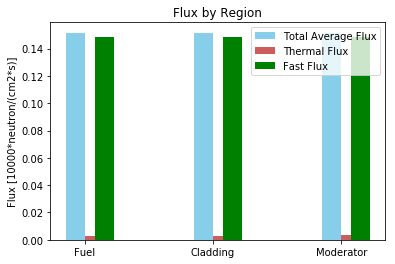

In [3]:
total =  (1.51250e-01, 1.51591E-01, 1.51588E-01)
thermal = (2.46509E-03, 2.97126E-03, 3.36391E-03)
fast = (1.48731E-01, 1.48567E-01, 1.48172E-01)

ind = np.arange(len(total))  # the x locations for the groups
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, total, width, color='SkyBlue', label='Total Average Flux')
rects2 = ax.bar(ind + width/2, thermal, width, color='IndianRed', label='Thermal Flux')
rects3 = ax.bar(ind + width, fast, width, color='Green', label='Fast Flux')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Flux [10000*neutron/(cm2*s)]')
ax.set_title('Flux by Region')
ax.set_xticks(ind)
ax.set_xticklabels(('Fuel', 'Cladding', 'Moderator'))
ax.legend()




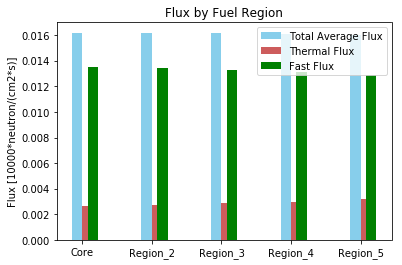

In [4]:
total6 =  (1.61809e-02, 1.61690e-02, 1.61309e-02, 1.60925e-02, 1.60389e-02)
thermal6 = (2.66372e-03, 2.76299e-03, 2.86679e-03, 2.99604e-03, 3.16416e-03)
fast6 = (1.35076e-02, 1.33967e-02, 1.32550e-02, 1.30875e-02, 1.28662e-02)

ind2 = np.arange(len(total6))  # the x locations for the groups
width = 0.15  # the width of the bars

fig2, ax2 = plt.subplots()
rects11 = ax2.bar(ind2 - width/2, total6, width, color='SkyBlue', label='Total Average Flux')
rects12 = ax2.bar(ind2 + width/2, thermal6, width, color='IndianRed', label='Thermal Flux')
rects13 = ax2.bar(ind2 + width, fast6, width, color='Green', label='Fast Flux')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Flux [10000*neutron/(cm2*s)]')
ax2.set_title('Flux by Fuel Region')
ax2.set_xticks(ind2)
ax2.set_xticklabels(('Core', 'Region_2', 'Region_3', 'Region_4', 'Region_5'))
ax2.legend()

In [5]:
with open('outputs/single_pin_6/outp') as f:
    lines_after_17 = f.readlines()[3192:3212]

In [6]:
import itertools

def clean_up(text):
    '''
    The text returned from BeatifulSoup had extra markups that we remove with the replace list. The data also has
    trace ('T') values for precip, so I assume that amount is 0.0 and replace all trace values.
    '''
    
    replace_list = ['  ', '\n', '   ']
    for r in replace_list:
        text = text.replace(r, '')
        text_final = text.replace('E', "e")
    return text_final

In [7]:
cleaned = []
for l in range(len(lines_after_17)):
    c_line = lines_after_17[l]
    clean_line = clean_up(c_line)
    cleaned.append(clean_line)
plot_data = []
for line in cleaned:
    numbers_str = line.split()
    num_float = [float(x) for x in numbers_str]
    plot_data.append(num_float)
plot_data

[[0.01, 0.0075161, 0.0006],
 [0.02, 0.000295878, 0.0032],
 [0.03, 0.000184685, 0.004],
 [0.04, 0.000139301, 0.0046],
 [0.05, 0.000113764, 0.005],
 [0.06, 9.95633e-05, 0.0054],
 [0.07, 8.88206e-05, 0.0057],
 [0.08, 8.00343e-05, 0.006],
 [0.09, 7.40036e-05, 0.0062],
 [0.1, 6.98753e-05, 0.0064],
 [1.0, 0.00324115, 0.001],
 [2.0, 0.00178883, 0.0015],
 [3.0, 0.00116479, 0.0021],
 [4.0, 0.000585225, 0.0031],
 [5.0, 0.000334092, 0.0044],
 [6.0, 0.000173508, 0.0063],
 [7.0, 9.03663e-05, 0.009],
 [8.0, 4.21401e-05, 0.0131],
 [9.0, 2.093e-05, 0.019],
 [10.0, 1.02694e-05, 0.0272]]

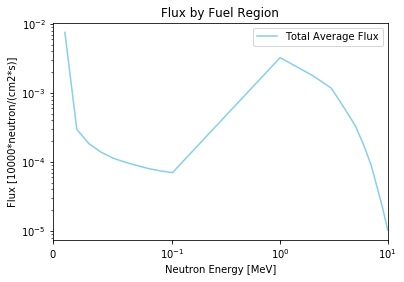

In [20]:
energy_x = []
for nrg in range(len(plot_data)):
    EE = plot_data[nrg][0]
    energy_x.append(EE)
flux_y =[]
for f in range(len(plot_data)):
    flux = plot_data[f][1]
    flux_y.append(flux)

width = 0.15  # the width of the bars

fig3, ax3 = plt.subplots()
ax3.plot(energy_x, flux_y, color='SkyBlue', label='Total Average Flux')
#ax1.set_xscale('symlog', basex=2)
ax3.set_xscale('symlog', linthreshx=.1)
ax3.set_yscale('log')
#rects12 = ax2.bar(ind2 + width/2, thermal6, width, color='IndianRed', label='Thermal Flux')
#rects13 = ax2.bar(ind2 + width, fast6, width, color='Green', label='Fast Flux')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_ylabel('Flux [10000*neutron/(cm2*s)]')
ax3.set_xlabel('Neutron Energy [MeV]')
ax3.set_title('Flux by Fuel Region')
ax3.set_xlim(0, 10)

ax3.legend()

In [9]:
flux_y
#energy_x

[0.0075161,
 0.000295878,
 0.000184685,
 0.000139301,
 0.000113764,
 9.95633e-05,
 8.88206e-05,
 8.00343e-05,
 7.40036e-05,
 6.98753e-05,
 0.00324115,
 0.00178883,
 0.00116479,
 0.000585225,
 0.000334092,
 0.000173508,
 9.03663e-05,
 4.21401e-05,
 2.093e-05,
 1.02694e-05]

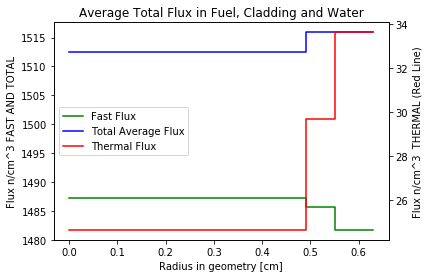

In [10]:
n_neutron = 10000

th_fuel = 2.46509e-3
fast_fuel = 1.48731e-1
total_fuel = 1.51250e-1

th_clad = 2.97126e-3
fast_clad = 1.48567e-1
total_clad = 1.51591e-1

th_mod= 3.36391e-3
fast_mod = 1.48172e-1
total_mod = 1.51588e-1


x = [0, .49, .55, .63] 
thermal = [th_fuel*n_neutron, th_fuel*n_neutron, th_clad*n_neutron, th_mod*n_neutron]
fast = [fast_fuel*n_neutron, fast_fuel*n_neutron, fast_clad*n_neutron, fast_mod*n_neutron]
total = [total_fuel*n_neutron, total_fuel*n_neutron, total_clad*n_neutron, total_mod*n_neutron]

#plt.yrange(270, )
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
plt.title('Average Total Flux in Fuel, Cladding and Water', fontsize=12)

ax1.set_xlabel('Radius in geometry [cm]',fontsize=10)
ax2.set_ylabel('Flux n/cm^3  THERMAL (Red Line)',fontsize=10)
ax1.set_ylabel('Flux n/cm^3 FAST AND TOTAL',fontsize=10)

th_plt = ax2.step(x, thermal, label='Thermal Flux', color='r')
fst_plot = ax1.step(x, fast, label='Fast Flux', color='g')
total_plot = ax1.step(x, total, label='Total Average Flux', color='b')

lines = fst_plot+total_plot+th_plt
labels = [l.get_label() for l in lines]
legend = ax1.legend(lines, labels, loc='center left', fontsize=10)

#plt.savefig('q5_c_flux.jpg')
plt.show()